In [2]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
 
# for accuracy and loss graph
import matplotlib.pyplot as plt
import tensorflow
 
print(keras.__version__)
print(tensorflow.__version__)

2.8.0
2.8.2


In [3]:
train_data_path = "/content/drive/MyDrive/Face Mask Dataset/Train"
validation_data_path = "/content/drive/MyDrive/Face Mask Dataset/Validation"

In [5]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
 

In [4]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [6]:
# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(200, 200), # all images will be resized to 150x150
                                      batch_size=128,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels
 
training_data.class_indices

Found 10010 images belonging to 2 classes.


{'WithMask': 0, 'WithoutMask': 1}

In [7]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)
 
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(200,200),
                                  batch_size=128,
                                  class_mode='binary')

Found 801 images belonging to 2 classes.


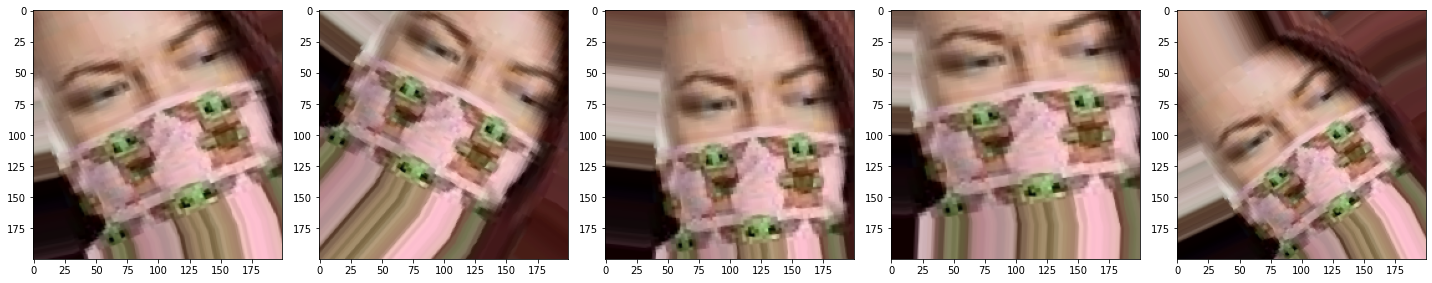

In [8]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [9]:
# save best model using vall accuracy
model_path = "/content/drive/MyDrive/model/model.h5"
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [10]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(4,4)),
                                    keras.layers.Conv2D(filters=64, kernel_size=4),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    # keras.layers.Conv2D(filters=256, kernel_size=2),
                                    # keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

In [11]:
# compile cnn model
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.001)
cnn_model.compile(optimizer = opt , loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=10, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 14.25

Epoch 1/10
79/79 [==============================] - ETA: 0s - loss: 0.3373 - accuracy: 0.8579 
Epoch 1: val_accuracy improved from -inf to 0.95630, saving model to /content/drive/MyDrive/model/model.h5
79/79 [==============================] - 962s 12s/step - loss: 0.3373 - accuracy: 0.8579 - val_loss: 0.1395 - val_accuracy: 0.9563
Epoch 2/10
79/79 [==============================] - ETA: 0s - loss: 0.2361 - accuracy: 0.9122
Epoch 2: val_accuracy improved from 0.95630 to 0.95755, saving model to /content/drive/MyDrive/model/model.h5
79/79 [==============================] - 108s 1s/step - loss: 0.2361 - accuracy: 0.9122 - val_loss: 0.1269 - val_accuracy: 0.9576
Epoch 3/10
79/79 [==============================] - ETA: 0s - loss: 0.2128 - accuracy: 0.9193
Epoch 3: val_accuracy improved from 0.95755 to 0.96380, saving model to /content/drive/MyDrive/model/model.h5
79/79 [==============================] - 110s 1s/step - loss: 0.2128 - accuracy: 0.9193 - val_loss: 0.1188 - val_accuracy: 0.9638

In [13]:
cnn_model.save('/content/drive/MyDrive/model/model_last.h5')

In [18]:
# plot the loss
import numpy as np
loss=history.history['loss']
accuracy=history.history['accuracy']
val_loss=history.history['val_loss']
val_accuracy=history.history['val_accuracy']
epoch=np.arange(1,11)

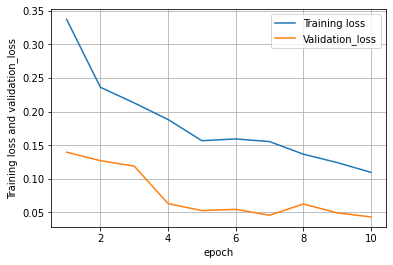

In [19]:
plt.plot(epoch,loss,label="Training loss")
plt.plot(epoch,val_loss,label='Validation_loss')
plt.xlabel("epoch")
plt.ylabel("Training loss and validation_loss")
plt.grid(axis="both")
plt.legend()
plt.show()

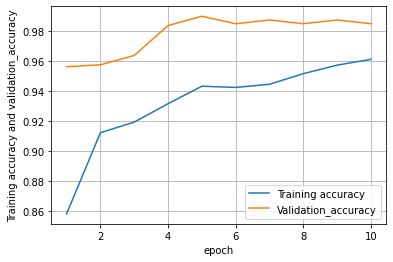

In [20]:
import matplotlib.pyplot as plt
plt.plot(epoch,accuracy,label="Training accuracy")
plt.plot(epoch,val_accuracy,label='Validation_accuracy')
plt.xlabel("epoch")
plt.ylabel("Training accuracy and validation_accuracy")
plt.grid(axis="both")
plt.legend()
plt.show()

# Training Model using Resnet152V2 CNN Architecture

In [21]:
import datetime
datetime.datetime.now()
 
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
 
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [22]:
# import the libraries as shown below
 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten  #for layers
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import preprocess_input  #transfer learning model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img  # image augmentation
from tensorflow.keras.models import Sequential #sequqential model
from tensorflow.keras.callbacks import ModelCheckpoint  # save best validation point
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
 
import tensorflow
import keras
print(tensorflow.__version__)
print(keras.__version__)

2.8.2
2.8.0


In [23]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [24]:
#path for validation and training dataset
train_data_path = "/content/drive/MyDrive/Face Mask Dataset/Train"
validation_data_path = "/content/drive/MyDrive/Face Mask Dataset/Validation"

In [25]:
# Import the ResNet152V2 library as shown below and add preprocessing layer to the front of ResNet152V2
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

234561536/234545216 [==============================] - 1s 0us/step


In [26]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [27]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Face Mask Dataset/Train/*')

In [28]:
# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [29]:
prediction = Dense(len(folders), activation='softmax')(x)

In [30]:
# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [31]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [32]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [33]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
 
test_datagen = ImageDataGenerator(rescale = 1./255)

In [36]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_data_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
 
test_set = test_datagen.flow_from_directory(validation_data_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 10010 images belonging to 2 classes.
Found 801 images belonging to 2 classes.


In [37]:
# save best model using vall accuracy
model_path = '/content/drive/MyDrive/model/resnet152v2.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [38]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=callbacks_list
)

Epoch 1/10
313/313 [==============================] - ETA: 0s - loss: 0.1387 - accuracy: 0.9938
Epoch 1: val_accuracy improved from -inf to 0.99875, saving model to /content/drive/MyDrive/model/resnet152v2.h5
313/313 [==============================] - 168s 510ms/step - loss: 0.1387 - accuracy: 0.9938 - val_loss: 0.0182 - val_accuracy: 0.9988
Epoch 2/10
313/313 [==============================] - ETA: 0s - loss: 0.0605 - accuracy: 0.9976
Epoch 2: val_accuracy did not improve from 0.99875
313/313 [==============================] - 152s 484ms/step - loss: 0.0605 - accuracy: 0.9976 - val_loss: 0.0182 - val_accuracy: 0.9988
Epoch 3/10
313/313 [==============================] - ETA: 0s - loss: 0.0392 - accuracy: 0.9986
Epoch 3: val_accuracy did not improve from 0.99875
313/313 [==============================] - 151s 482ms/step - loss: 0.0392 - accuracy: 0.9986 - val_loss: 0.0162 - val_accuracy: 0.9988
Epoch 4/10
313/313 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.9

In [39]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/model/last_resnet152v2.h5')
 

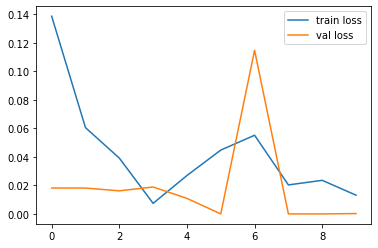

<Figure size 432x288 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

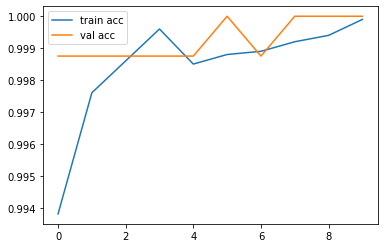

datetime.datetime(2022, 6, 13, 16, 20, 50, 139691)

<Figure size 432x288 with 0 Axes>

In [41]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')
datetime.datetime.now()